# PCA and K-means for Satellite Image Classification

## Introduction

Satellite images have become an increasingly important tool in environmental and ecological studies. By analyzing images of the Earth's surface, scientists can gain a wealth of information about land use, vegetation, and other environmental variables. One of the challenges of working with satellite images is that they often have a large number of bands, each containing different information. To simplify the data and make it easier to analyze, a common approach is to reduce the dimensionality of the data using principal component analysis (PCA).

In this notebook, we will demonstrate how to calculate the PCA of an 8-band satellite image, and how to classify the three-band PCA data into discrete regions using K-Means classification.

## Background

Principal component analysis (PCA) is a dimensionality reduction technique that transforms the data into a new coordinate system, where the first axis (principal component) represents the direction of maximum variance in the data. By retaining only the first few principal components, we can reduce the number of bands in the data while still capturing the most important information.

K-means is a popular clustering algorithm that is often used for image data classification. The algorithm works by dividing the data into a specified number of clusters (k) and finding the mean of each cluster. The mean is then used as the representative of the cluster. The data points are then assigned to the closest mean, creating a new cluster. The process continues until the cluster means no longer change. K-means has been applied to image data to perform tasks such as color quantization, image segmentation, and object recognition. In color quantization, the algorithm is used to reduce the number of colors in an image while maintaining its visual quality. In image segmentation, k-means is used to separate an image into multiple segments, each representing a different object or region. In object recognition, k-means is used to cluster similar features of an object, allowing for faster and more accurate recognition. K-means has been widely studied and several improvements have been proposed, such as the use of different distance metrics, the addition of constraints, and the use of parallel computing. (References: J. MacQueen, “Some Methods for Classification and Analysis of Multivariate Observations,” Proceedings of the 5th Berkeley Symposium on Mathematical Statistics and Probability, 1967; S. Chatterjee, A. G. Rafiei, "A review of image segmentation techniques," Journal of Visual Communication and Image Representation, vol. 18, no. 2, pp. 167-187, 2007).


In [1]:
# Importing Libraries
import rasterio
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

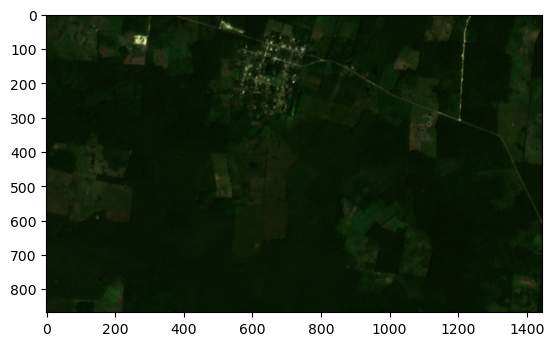

In [2]:
# Load the 8-band satellite image data

# filename = './data/20221022_152928_50_241b_3B_AnalyticMS_SR_8b.tif'
filename = './data/small.tif'

with rasterio.open(filename) as src:
    image = src.read()

# Select the desired bands
blue = image[1, :, :]
green = image[3, :, :]
red = image[5, :, :]

# Normalize the bands
blue = blue / blue.max()
green = green / green.max()
red = red / red.max()

# Combine the bands into an RGB image
rgb = np.stack([red, green, blue], axis=2)

# Display the RGB image
plt.imshow(rgb)
plt.show()

In [3]:
# Read the satellite image file into a numpy array
image = iio.imread(filename)
np.save('satellite_image.npy', image)

image_data = np.load('satellite_image.npy')
print(image_data.shape)

image_data_2d = image_data.reshape(-1, image_data.shape[-1] )
print(image_data_2d.shape)


(868, 1446, 8)
(1255128, 8)



## Calculating PCA


In [4]:
# Initialize the PCA model with 3 components
pca = PCA(n_components=3)

# Fit the model to the image data
pca.fit(image_data_2d)

# Transform the data into the PCA space
pca_results = pca.transform(image_data_2d)
pca_results.shape

(1255128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


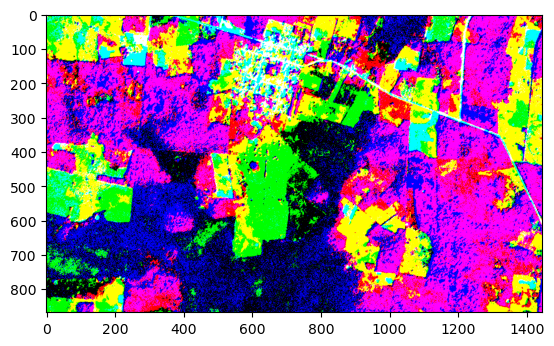

In [5]:
# Reshape the PCA results into a 2D image
pca_1 = pca_results[:, 0].reshape(image_data.shape[0], image_data.shape[1] )
pca_2 = pca_results[:, 1].reshape(image_data.shape[0], image_data.shape[1] )
pca_3 = pca_results[:, 2].reshape(image_data.shape[0], image_data.shape[1] )

# Combine the bands into an RGB image
pca_rgb = np.stack([pca_1, pca_2, pca_3], axis=2)

# Display the RGB image
plt.imshow(pca_rgb)
plt.show()


## Classifying the PCA Results Using K-means



(1255128,)
(868, 1446)


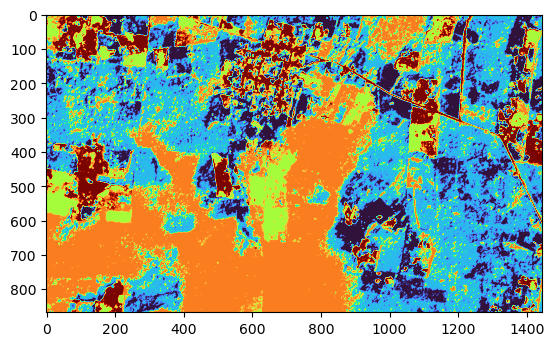

In [6]:
# # Define the number of clusters
n_clusters = 5

# Initialize the k-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')

# Fit the model to the data
kmeans.fit(pca_results)

# Predict the cluster assignments for each pixel
labels = kmeans.predict(pca_results)
print(labels.shape)
# Reshape the labels back into the original image shape
labels = labels.reshape(image_data.shape[0], image_data.shape[1])
print(labels.shape)

# Plot the image and display the results
plt.imshow(labels, cmap='turbo')
plt.show()


## Conclusion

By reducing the dimensionality of the satellite image data using PCA and then classifying the data into discrete regions using K-means, we can simplify the data and make it easier to analyze. This process can be particularly useful in identifying species habitats, which is important for supporting conservation efforts.

In addition, by using modern data science techniques such as PCA and K-means, we can improve our understanding of the environment and support economic development
